<a href="https://colab.research.google.com/github/rayjinghaolei/UWARG-CV/blob/main/YoloV2_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

In [7]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2021-02-10 00:21:16--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  5.27MB/s    in 38s     

2021-02-10 00:21:53 (5.18 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!ls
!./darknet detect cfg/yolov2.cfg yolov2.weights data/eagle.jpg
imShow('predictions.jpg')

In [9]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [10]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
!ls /mydrive/yolov2_transfer_learning

In [12]:
%cd darknet/

/content/darknet


In [13]:
!cp /mydrive/yolov2_transfer_learning/obj.zip ../

In [ ]:
%cd data/
!mkdir images
!ls
%cd ..

In [ ]:
!unzip ../obj.zip -d data/images

In [16]:
!cp /mydrive/yolov2_transfer_learning/yolov2_custom.cfg ./cfg
!cp /mydrive/yolov2_transfer_learning/obj.data ./data
!cp /mydrive/yolov2_transfer_learning/obj.names ./data
!cp /mydrive/yolov2_transfer_learning/generate_train.py ./
!cp /mydrive/yolov2_transfer_learning/generate_valid.py ./

In [ ]:
!python generate_train.py
!python generate_valid.py
!ls data/

In [ ]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2021-02-07 23:34:44--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  3.53MB/s    in 25s     

2021-02-07 23:35:09 (2.99 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [ ]:
!ls

In [ ]:
%cd ..
!cp -r './darknet' '/mydrive/darknet'
%cd darknet

/content
/content/darknet


In [ ]:
!./darknet detector train data/obj.data cfg/yolov2_custom.cfg darknet19_448.conv.23 -dont_show

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov2_custom.cfg
!sed -i 's/subdivision=16/subdivision=1/' yolov2_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

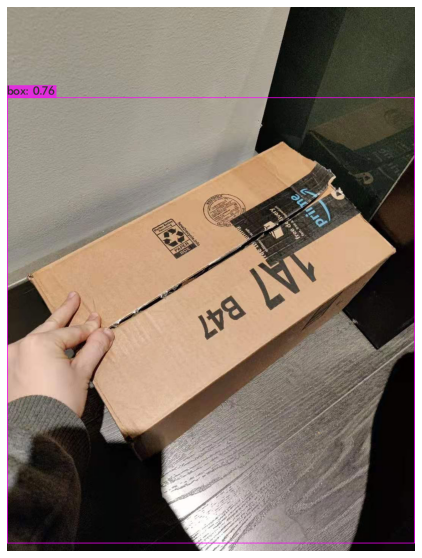

In [35]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

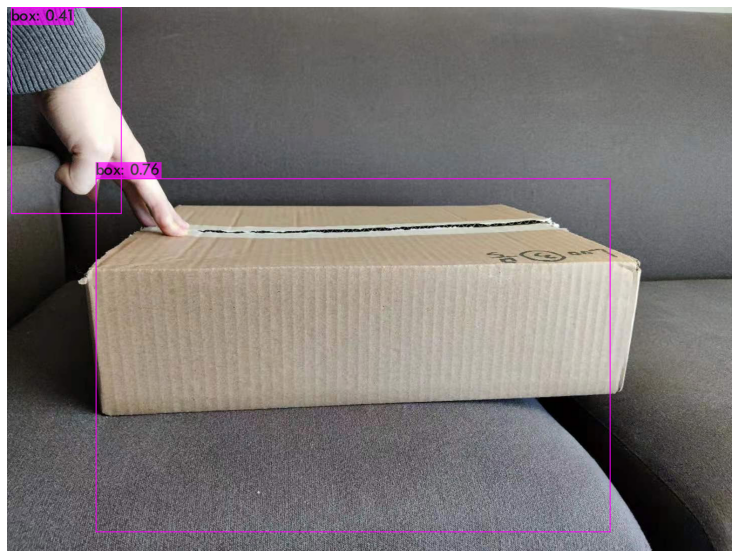

In [36]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_2.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

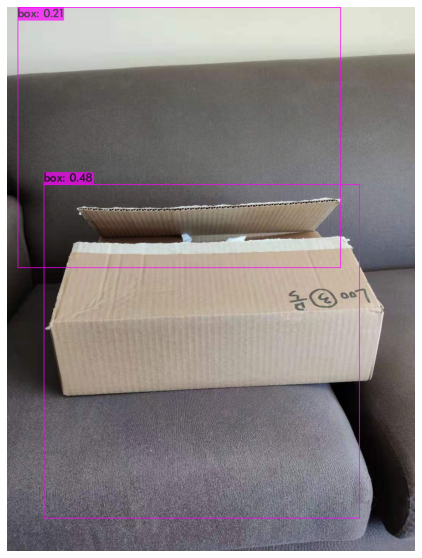

In [37]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_3.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

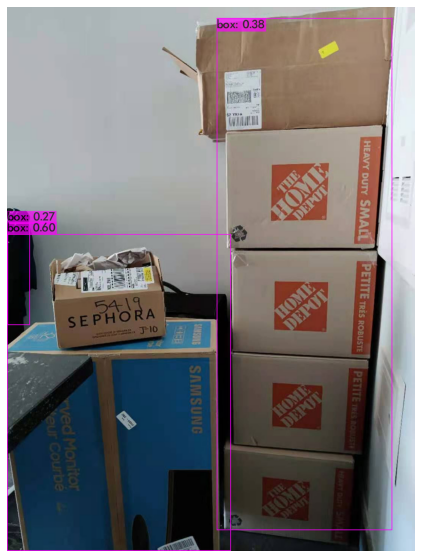

In [38]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_4.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

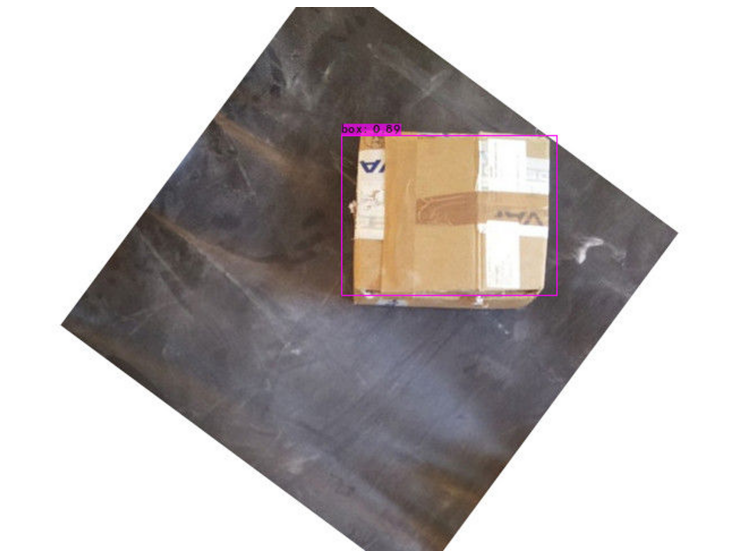

In [39]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights ./data/images/valid/10.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

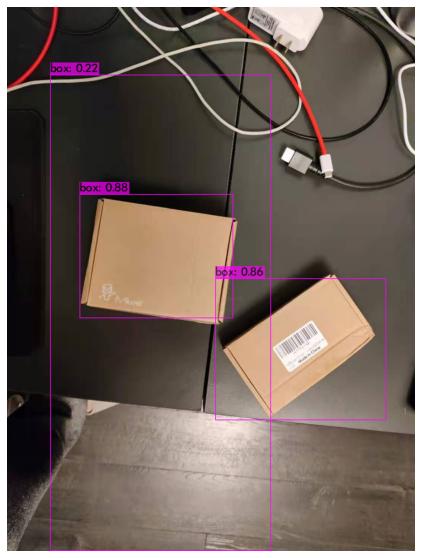

In [40]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_5.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

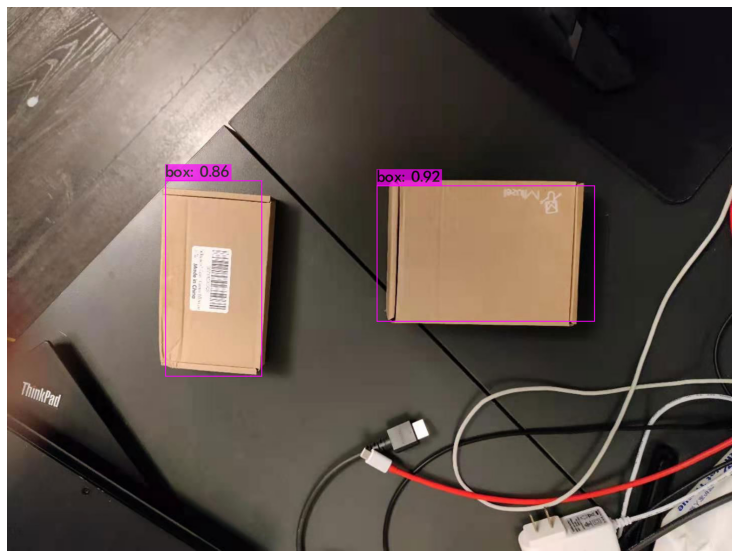

In [41]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_6.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

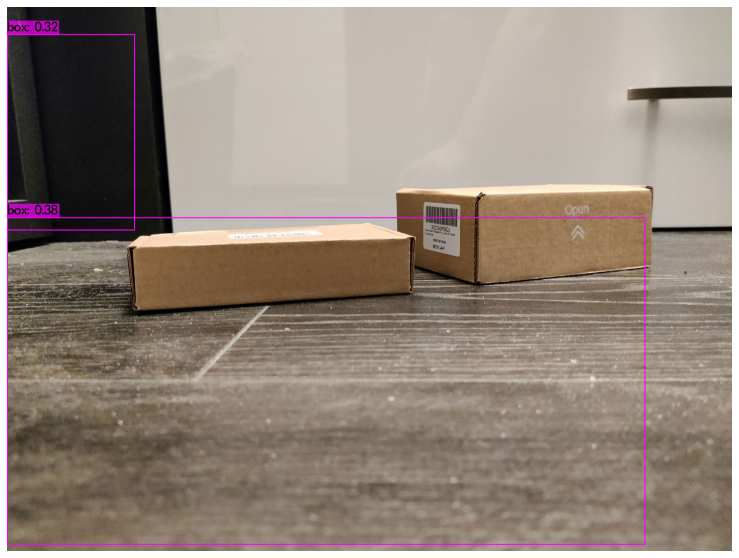

In [42]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_7.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

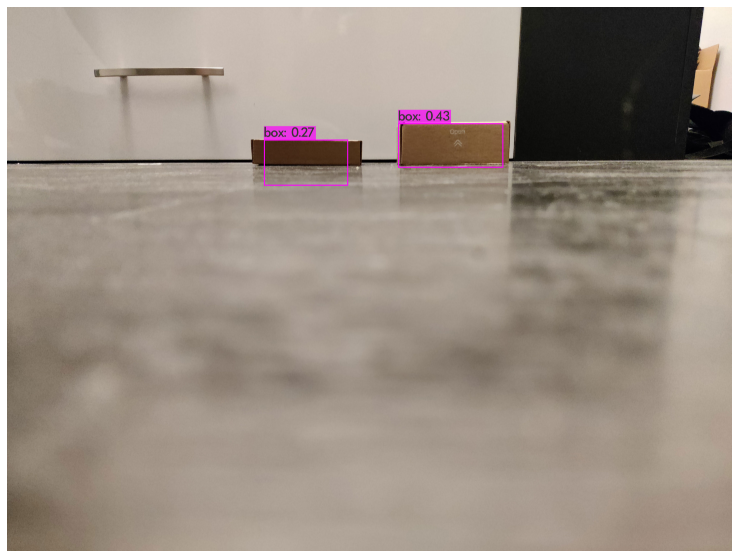

In [43]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_8.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

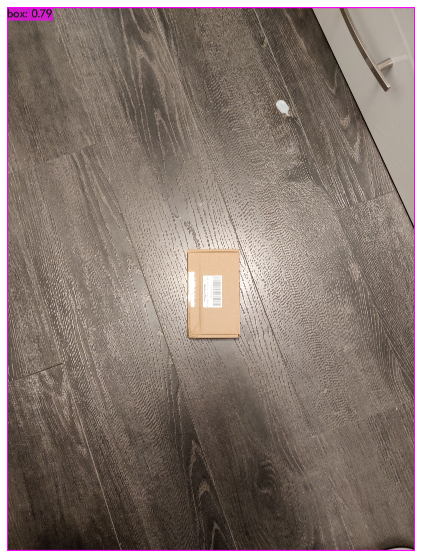

In [44]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_9.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

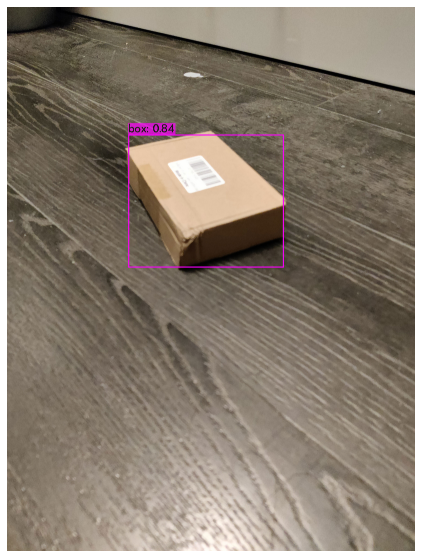

In [45]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_10.jpg -thresh 0.2
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 480 x   3 ->  640 x 480 x  32 0.531 BF
   1 max                2x 2/ 2    640 x 480 x  32 ->  320 x 240 x  32 0.010 BF
   2 conv     64       3 x 3/ 1    320 x 240 x  32 ->  320 x 240 x  64 2.831 BF
   3 max                2x 2/ 2    320 x 240 x  64 ->  160 x 120 x  64 0.005 BF
   4 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   5 conv     64       1 x 1/ 1    160 x 120 x 128 ->  160 x 120 x  64 0.315 BF
   6 conv    128       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x 128 2.831 BF
   7 max                2x 2/ 2    160 x 120 x 128 ->   80 x  60 x 128 0.002 BF
   8 conv    256       3 x 3/ 1     80 x  60 x 128 ->   80 x  60 x 2

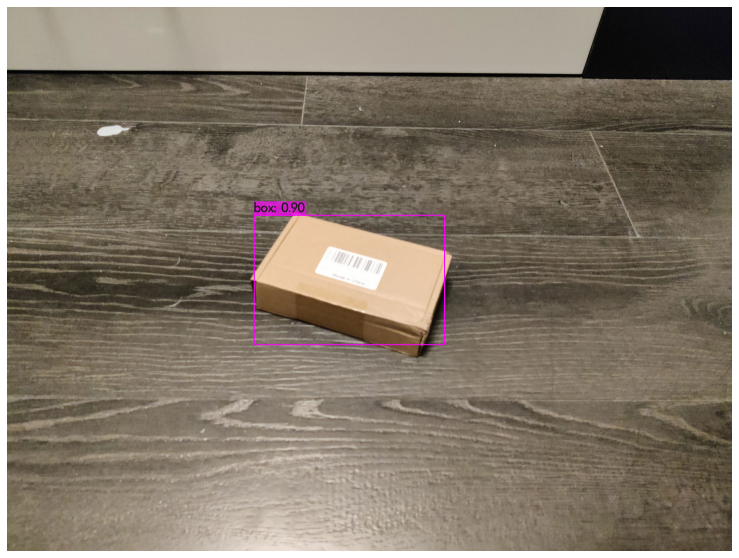

In [46]:
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/yolov2_transfer_learning/yolov2_custom_last.weights /mydrive/yolov2_transfer_learning/box_11.jpg -thresh 0.2
imShow('predictions.jpg')